In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

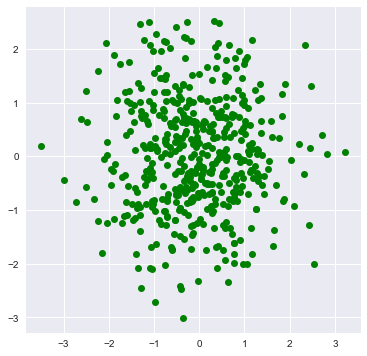

In [45]:
x = np.random.randn(500,2)
plt.figure(figsize=(6,6))
plt.plot(x[:,0], x[:,1], "og")

In [57]:
k=3
np.random.seed(101)
centroid=x[np.random.randint(500, size=k),:]

In [58]:
cluster_assign = np.random.randint(k, size=x.shape[0])

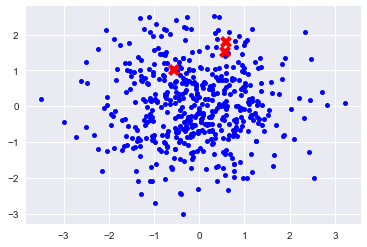

In [59]:
plt.figure()
plt.plot(x[:,0], x[:,1], "ob", markersize=5)
for i in range(k):
    plt.plot(centroid[i,0], centroid[i,1], "Xr", markersize=12)

In [60]:
def distance(p, q):
    return pow(sum(pow(p-q, 2)), 0.5)

In [61]:
def update_cluster():
    dist_to_mean = [distance(x[i,:], centroid[0,:]) for i in range(x.shape[0])]
    for j in range(1,k):
        dist_to_mean = np.column_stack((dist_to_mean, [distance(x[i,:], centroid[j,:]) for i in range(x.shape[0])]))
    return np.array([np.argmin(dist_to_mean[i,:]) for i in range(dist_to_mean.shape[0])])

In [62]:
def update_mean():
    centroid_updated = np.zeros(centroid.shape)
    for j in range(max(cluster_assign)+1):
        cluster_assign_ser = pd.Series(cluster_assign)
        temp = x[np.array(cluster_assign_ser[cluster_assign_ser==j].index),:]
        centroid_updated[j,:] = np.array([np.mean(temp[:,i]) for i in range(temp.shape[1])])
    return centroid_updated

In [63]:
def plot_mean():
    plt.plot(x[:,0], x[:,1], ".b")
    for i in range(k):
        plt.plot(centroid[i,0], centroid[i,1], "Xr", markersize=12)

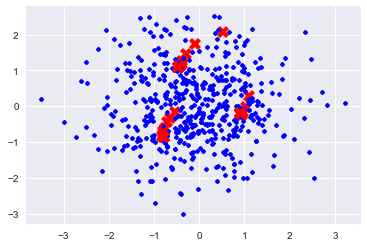

In [64]:
flag = False
counter = 0
while flag==False:
    cluster_assign_new = update_cluster()
    flag = min(cluster_assign_new == cluster_assign)
    cluster_assign = cluster_assign_new
    centroid = update_mean()
    plot_mean()
    counter = counter+1
    if counter==100:
        print("max no. of iterations reached")
        break

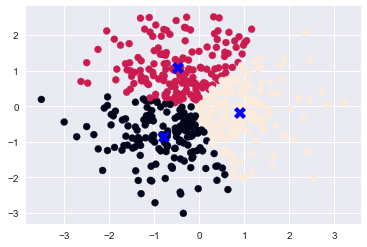

In [66]:
plt.scatter(x[:,0], x[:,1], c=cluster_assign)
for i in range(k):
        plt.plot(centroid[i,0], centroid[i,1], "Xb", markersize=12)

In [67]:
from sklearn.datasets import load_iris
iris = load_iris()

In [68]:
x = iris.data
k=3
centroid=x[np.random.randint(x.shape[0], size=k),:]
cluster_assign = np.random.randint(k, size=x.shape[0])

In [69]:
flag = False
counter = 0
while flag==False:
    cluster_assign_new = update_cluster()
    flag = min(cluster_assign_new == cluster_assign)
    cluster_assign = cluster_assign_new
    centroid = update_mean()
    counter = counter+1
    if counter==500:
        print("max no. of iterations reached")
        break

In [70]:
pd.DataFrame({'predicted':cluster_assign, 'true':iris.target}).groupby(['predicted', 'true']).size().unstack(fill_value=0)

true,0,1,2
predicted,,,
0,0,2,36
1,0,48,14
2,50,0,0
